## Load and Visualize Raw Data

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import sys

raw_file_path = "../data/raw/train.csv"
df = pd.read_csv(raw_file_path)
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [79]:
# quick column rename for personal preference
# Handles spaces, special characters, etc.
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)


In [80]:
print("==================")
print(df.shape)
print("==================")
print(df.dtypes)


(750000, 9)
id              int64
sex            object
age             int64
height        float64
weight        float64
duration      float64
heart_rate    float64
body_temp     float64
calories      float64
dtype: object


In [81]:
# check to see if we have any null values
print(df.count())
print(df.isna())

id            750000
sex           750000
age           750000
height        750000
weight        750000
duration      750000
heart_rate    750000
body_temp     750000
calories      750000
dtype: int64
           id    sex    age  height  weight  duration  heart_rate  body_temp  \
0       False  False  False   False   False     False       False      False   
1       False  False  False   False   False     False       False      False   
2       False  False  False   False   False     False       False      False   
3       False  False  False   False   False     False       False      False   
4       False  False  False   False   False     False       False      False   
...       ...    ...    ...     ...     ...       ...         ...        ...   
749995  False  False  False   False   False     False       False      False   
749996  False  False  False   False   False     False       False      False   
749997  False  False  False   False   False     False       False      False  

In [82]:
# we don't have any null values, but let's go through the data and perform some base sanity checks

# check the range of all numerical values (ensuring they are both positive and within expected ranges)
numerical_cols = ['age', 'height', 'weight', 'duration', 'heart_rate', 'body_temp', 'calories']
for col in numerical_cols:
    print(f'Column: {col} minimum value: {df[col].min()}') 
    print(f'Column: {col} maximum value: {df[col].max()}\n') 

Column: age minimum value: 20
Column: age maximum value: 79

Column: height minimum value: 126.0
Column: height maximum value: 222.0

Column: weight minimum value: 36.0
Column: weight maximum value: 132.0

Column: duration minimum value: 1.0
Column: duration maximum value: 30.0

Column: heart_rate minimum value: 67.0
Column: heart_rate maximum value: 128.0

Column: body_temp minimum value: 37.1
Column: body_temp maximum value: 41.5

Column: calories minimum value: 1.0
Column: calories maximum value: 314.0



In [83]:
# the data seems to be based in metric measurements, so to make things a bit more approachable we'll do some quick conversions to more familiar units

# convert bodyweight from kg to lbs
def lbs_to_kg(weight):
    return weight * 2.2046

df['weight_lbs'] = lbs_to_kg(df['weight'])

# convert celsius to farhenheit
def celsius_to_farhenheit(body_temp):
    return (body_temp * 9/5) + 32

df['body_temp_f'] = celsius_to_farhenheit(df['body_temp'])

# convert height from cm to in
def cm_to_in(height):
    return height / 2.54

df['height_inches'] = cm_to_in(df['height'])


df.head()


,id,sex,age,height,weight,duration,heart_rate,body_temp,calories,weight_lbs,body_temp_f,height_inches
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,180.7772,105.80,74.409449
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,132.2760,103.46,64.173228
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,141.0944,103.64,63.385827
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,198.4140,105.26,75.590551
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,134.4806,105.08,65.354331


In [84]:
# let's redo range checks with the new measurement units
numerical_cols = ['age', 'height_inches', 'weight_lbs', 'duration', 'heart_rate', 'body_temp_f', 'calories']
for col in numerical_cols:
    print(f'Column: {col} minimum value: {round(df[col].min(), 2)}')
    print(f'Column: {col} mean value: {round(df[col].mean(), 2)}') 
    print(f'Column: {col} maximum value: {round(df[col].max(), 2)}\n') 

Column: age minimum value: 20
Column: age mean value: 41.42
Column: age maximum value: 79

Column: height_inches minimum value: 49.61
Column: height_inches mean value: 68.78
Column: height_inches maximum value: 87.4

Column: weight_lbs minimum value: 79.37
Column: weight_lbs mean value: 165.67
Column: weight_lbs maximum value: 291.01

Column: duration minimum value: 1.0
Column: duration mean value: 15.42
Column: duration maximum value: 30.0

Column: heart_rate minimum value: 67.0
Column: heart_rate mean value: 95.48
Column: heart_rate maximum value: 128.0

Column: body_temp_f minimum value: 98.78
Column: body_temp_f mean value: 104.07
Column: body_temp_f maximum value: 106.7

Column: calories minimum value: 1.0
Column: calories mean value: 88.28
Column: calories maximum value: 314.0



In [85]:
# quick dataframe cleanup to remove cols we don't need
df.drop(columns=['height', 'weight', 'body_temp', 'id'], inplace=True)
df.head()

,sex,age,duration,heart_rate,calories,weight_lbs,body_temp_f,height_inches
0,male,36,26.0,101.0,150.0,180.7772,105.80,74.409449
1,female,64,8.0,85.0,34.0,132.2760,103.46,64.173228
2,female,51,7.0,84.0,29.0,141.0944,103.64,63.385827
3,male,20,25.0,105.0,140.0,198.4140,105.26,75.590551
4,female,38,25.0,102.0,146.0,134.4806,105.08,65.354331


In [86]:
df.describe()

,age,duration,heart_rate,calories,weight_lbs,body_temp_f,height_inches
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,15.421015,95.483995,88.282781,165.666140,104.065256,68.778616
std,15.175049,8.354095,9.449845,62.395349,30.826268,1.403774,5.049014
min,20.000000,1.000000,67.000000,1.000000,79.365600,98.780000,49.606299
25%,28.000000,8.000000,88.000000,34.000000,138.889800,103.280000,64.566929
50%,40.000000,15.000000,95.000000,77.000000,163.140400,104.540000,68.503937
75%,52.000000,23.000000,103.000000,136.000000,191.800200,105.260000,72.834646
max,79.000000,30.000000,128.000000,314.000000,291.007200,106.700000,87.401575


20


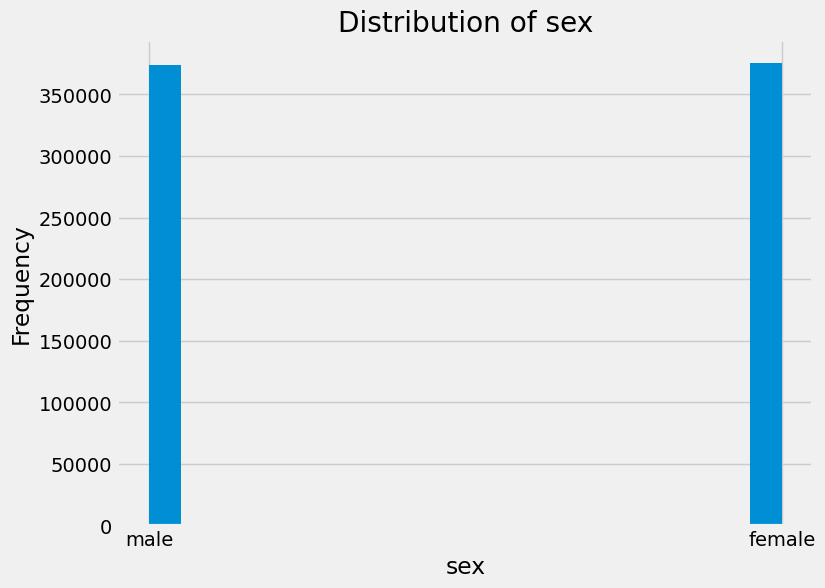

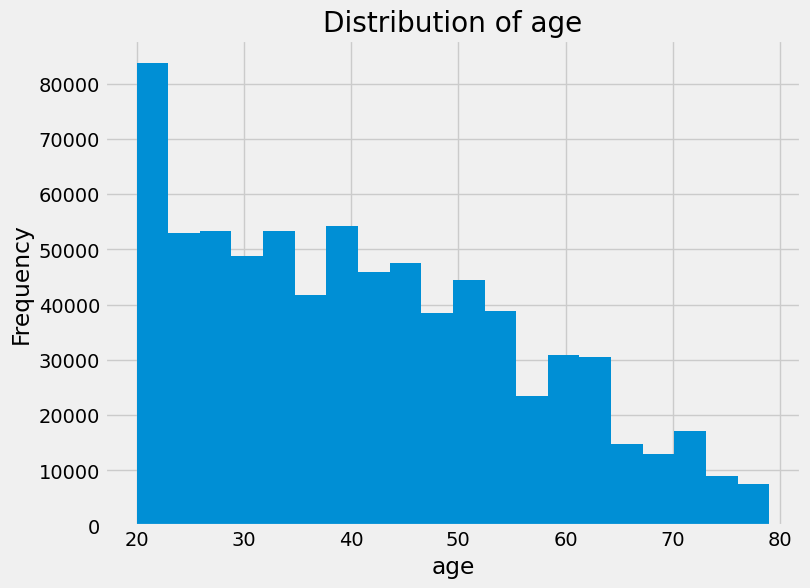

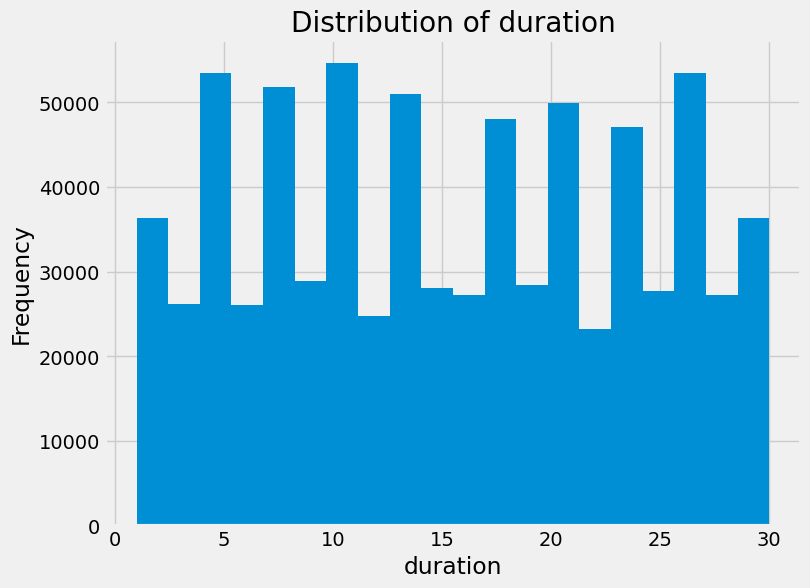

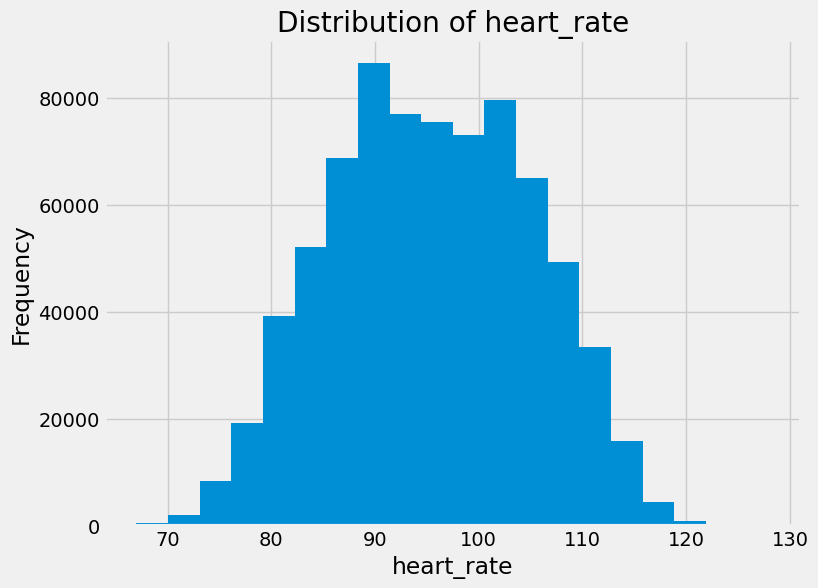

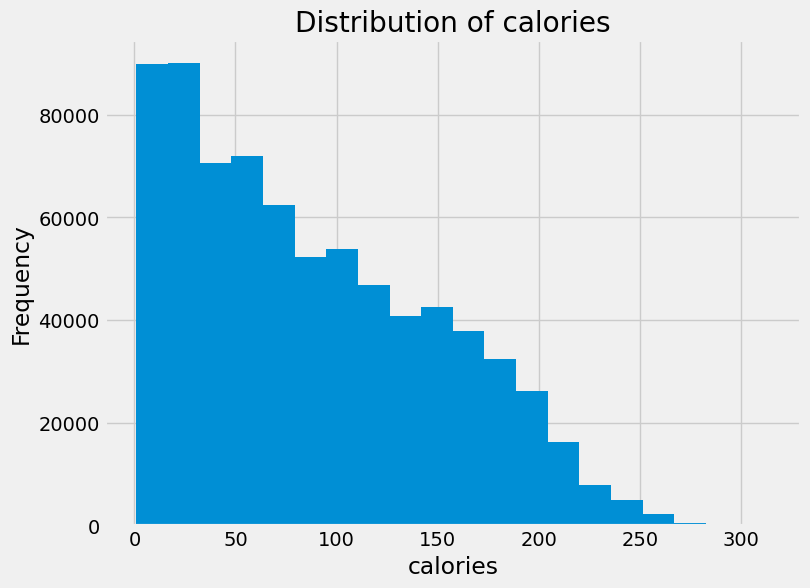

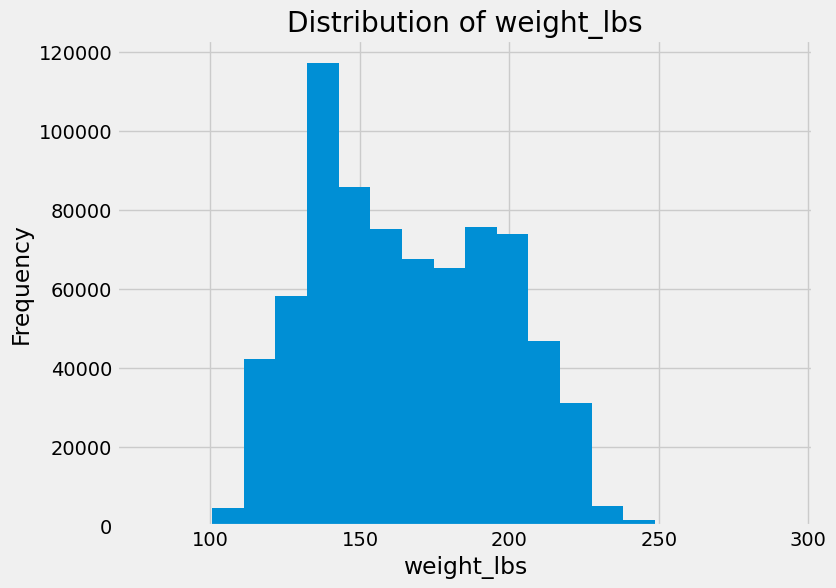

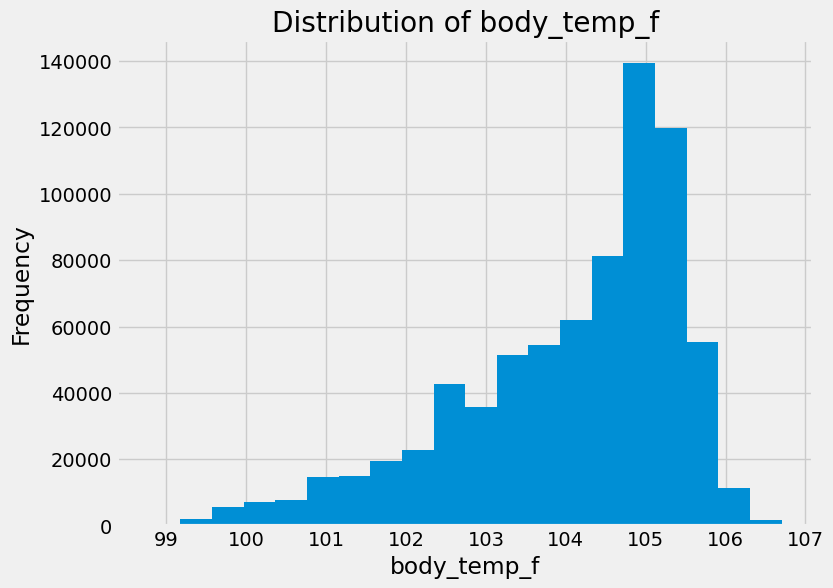

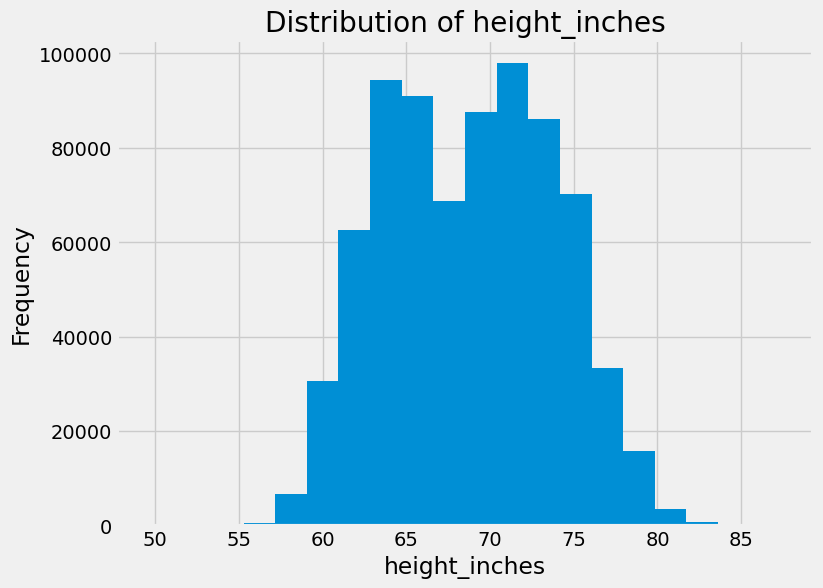

In [89]:
# now let's do quick statistical analysis of the features and get some distributions of all the variables visualized 
#   (we can also use this as a check to ensure our inferred measurements were correct and follow expected patterns)


# use sturge's rule to get initial bin number
import math
num_observations = df['age'].count()
num_bins = int(math.log2(num_observations) + 1)
print(num_bins)

for col in df.columns:
    plt.figure(figsize=(8, 6))
    df[col].hist(bins=num_bins)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()